In [72]:
#https://github.com/indohito/EE399/tree/main/EE399HW3

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0  # Scale the data to [0, 1]
y = mnist.target

Text(0, 0.5, 'singular value')

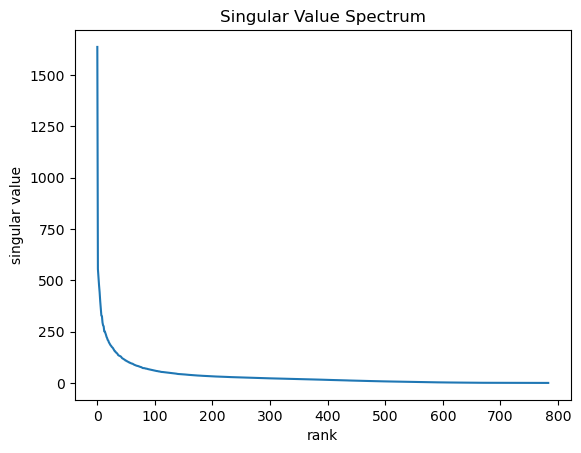

In [73]:
U, S, Vt = np.linalg.svd(X.T, full_matrices = False)

plt.plot(S)
plt.title("Singular Value Spectrum")
plt.xlabel("rank")
plt.ylabel("singular value")
rank = 50

(70000, 50)


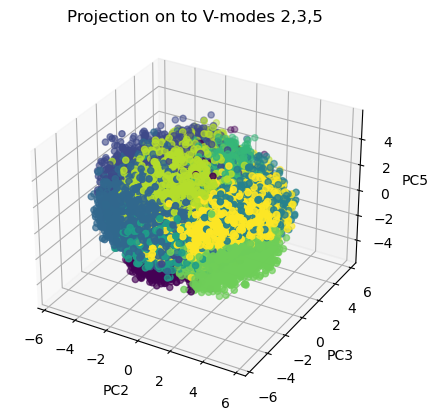

In [156]:
pca = PCA(n_components = rank)
X_pca = pca.fit_transform(X)
print(X_pca.shape)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 1], X_pca[:, 2], X_pca[:, 4], c=mnist.target.astype(int), s=20)
ax.set_title("Projection on to V-modes 2,3,5")
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC5')

plt.show()

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rank = 50
pca = PCA(n_components = rank)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# 2 digit classifier 
d1 = '1'
d2 = '8'

X_train_2d = X_train[(y_train == d1) | (y_train == d2)]
y_train_2d = y_train[(y_train == d1) | (y_train == d2)]

X_test_2d = X_test[(y_test == d1) | (y_test == d2)]
y_test_2d = y_test[(y_test == d1) | (y_test == d2)]

lda = LDA()
lda.fit(X_train_2d, y_train_2d)

y_pred_2d_tr = lda.predict(X_train_2d)
score_2d_tr = accuracy_score(y_train_2d, y_pred_2d_tr)
print("Accuracy of TRAIN classification between digits 1 and 8: {:.2f}".format(score_2d_tr))

y_pred = lda.predict(X_test_2d)
score = accuracy_score(y_test_2d, y_pred)

print("Accuracy of TEST classification between digits 1 and 8: {:.2f}".format(score))

Accuracy of TRAIN classification between digits 1 and 8: 0.97
Accuracy of TEST classification between digits 1 and 8: 0.97


In [138]:
# 3 digit linear classifier
d1 = '1'
d2 = '4'
d3 = '5'
X_train_3d = X_train[(y_train == d1) | (y_train == d2) | (y_train == d3)]
y_train_3d = y_train[(y_train == d1) | (y_train == d2) | (y_train == d3)]

X_test_3d = X_test[(y_test == d1) | (y_test == d2) | (y_test == d3)]
y_test_3d = y_test[(y_test == d1) | (y_test == d2) | (y_test == d3)]

lda = LDA()
lda.fit(X_train_3d, y_train_3d)

y_pred_3d_tr = lda.predict(X_train_3d)
score_3d_tr = accuracy_score(y_train_3d, y_pred_3d_tr)
print("Accuracy of TRAIN classification between digits 1 4 and 5: {:.2f}".format(score))

y_pred = lda.predict(X_test_3d)
score = accuracy_score(y_test_3d, y_pred)
print("Accuracy of TEST classification between digits 1 4 and 5: {:.2f}".format(score))

Accuracy of TRAIN classification between digits 1 4 and 5: 0.97
Accuracy of TEST classification between digits 1 4 and 5: 0.98


In [127]:
# get all pairs so we can see which is the highest and the lowest of them 
pairs = []
for i in range(10):
    for j in range(10):
        if (i,j) not in pairs and (j,i) not in pairs and i!=j:
            pairs.append((i,j))
            
def two_digit_seperator(x, y, d1, d2):
    X = x[( y == d1) | (y == d2)]
    y_2 = y[(y == d1) | (y == d2)]
    return X, y_2

In [118]:
# predicting the highest accuracy and lowest accuracy pairs using LDA
accuracy_2d = []
for pair in pairs:
    X_train_2d, y_train_2d = two_digit_seperator(X_train, y_train, str(pair[0]), str(pair[1]))
 
    X_test_2d, y_test_2d = two_digit_seperator(X_test, y_test, str(pair[0]), str(pair[1]))
    lda = LDA()
    lda.fit(X_train_2d, y_train_2d)
    y_pred = lda.predict(X_test_2d)
    score = accuracy_score(y_test_2d, y_pred)
    accuracy_2d.append(score)

In [124]:
print(f"The highest is {pairs[np.argmax(accuracy_2d)]} with and a test accuracy of {np.max(accuracy_2d)}")
print(f"The lowest is {pairs[np.argmin(accuracy_2d)]} with and test accuracy of {np.min(accuracy_2d)}")

The highest is (6, 7) with and accuracy of 0.9978693181818182
The lowest is (3, 5) with and accuracy of 0.9434034416826004


In [139]:
from sklearn.svm import SVC

# using SVM to seperate all ten digits
clf = SVC()
clf.fit(X_train, y_train)

y_pred_SVC_t = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_SVC_t)

print(f"Training Accuracy for SVM: {accuracy:.2f}")

y_pred_SVC = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_SVC)

print(f"Testing Accuracy for SVM: {accuracy:.2f}")

Training Accuracy for SVM: 0.99
Testing Accuracy for SVM: 0.98


In [150]:
from sklearn.tree import DecisionTreeClassifier
# using DescionTreeClassifier to seperarate all ten digits
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state = 42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_DTC_t = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_DTC_t)

print(f"Training Accuracy for DecisionTreeClassifier: {accuracy:.2f}")
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Testing Accuracy for DecisionTreeClassifier: {accuracy:.2f}")


Training Accuracy for DecisionTreeClassifier: 1.00
Testing Accuracy for DecisionTreeClassifier: 0.84


In [130]:
# higest and lowest accuracies to classify
hd1, hd2 = str(pairs[np.argmax(accuracy_2d)][0]), str(pairs[np.argmax(accuracy_2d)][1])
ld1, ld2 = str(pairs[np.argmin(accuracy_2d)][0]), str(pairs[np.argmin(accuracy_2d)][1])

#SVM to seperate hardest and easiset pairs 

In [165]:
# #SVM to seperate hardest and easiset pairs 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
#easiest
X_train_SVC, y_train_SVC = two_digit_seperator(X_train, y_train, hd1, hd2)
X_test_SVC, y_test_SVC = two_digit_seperator(X_test, y_test, hd1, hd2)
clf = SVC()
clf.fit(X_train_SVC, y_train_SVC)

y_pred = clf.predict(X_train_SVC)
accuracy_easiest = accuracy_score(y_train_SVC, y_pred)
print(f"Training Accuracy for easiest pair SVC {accuracy_easiest}")
y_pred = clf.predict(X_test_SVC)
accuracy_easiest = accuracy_score(y_test_SVC, y_pred)
print(f"Test Accuracy for easiest pair SVC {accuracy_easiest}")
#hardest
X_train_SVC, y_train_SVC = two_digit_seperator(X_train, y_train, ld1, ld2)
X_test_SVC, y_test_SVC = two_digit_seperator(X_test, y_test, ld1, ld2)
clf = SVC()
clf.fit(X_train_SVC, y_train_SVC)

y_pred = clf.predict(X_train_SVC)
accuracy_hardest = accuracy_score(y_train_SVC, y_pred)
print(f"Training Accuracy for hardest pair SVC {accuracy_hardest}")

y_pred = clf.predict(X_test_SVC)
accuracy_hardest = accuracy_score(y_test_SVC, y_pred)
print(f"Test Accuracy for hardest pair SVC {accuracy_hardest}")

Training Accuracy for easiest pair SVC 1.0
Test Accuracy for easiest pair SVC 1.0
Training Accuracy for hardest pair SVC 0.9971232368225686
Test Accuracy for hardest pair SVC 0.9951456310679612


In [167]:
#Descision Tree Classifier to seperate hardest and easiset pairs 

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state = 42)
#easiest
X_train_DTC, y_train_DTC = two_digit_seperator(X_train, y_train, hd1, hd2)
X_test_DTC, y_test_DTC = two_digit_seperator(X_test, y_test, hd1, hd2)
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_DTC, y_train_DTC)

y_pred = dtc.predict(X_train_DTC)
accuracy_hardest = accuracy_score(y_train_DTC, y_pred)
print(f"Train Accuracy for easiest pair Descision Tree Classifier {accuracy_easiest}")

y_pred = dtc.predict(X_test_DTC)
accuracy_hardest = accuracy_score(y_test_DTC, y_pred)
print(f"Test Accuracy for easiest pair Descision Tree Classifier {accuracy_easiest}")

# hardest
X_train_DTC, y_train_DTC = two_digit_seperator(X_train, y_train, ld1, ld2)
X_test_DTC, y_test_DTC = two_digit_seperator(X_test, y_test, ld1, ld2)

dtc.fit(X_train_DTC, y_train_DTC)

y_pred = dtc.predict(X_train_DTC)
accuracy_easiest = accuracy_score(y_train_DTC, y_pred)
print(f"Train Accuracy for hardest pair Descision Tree Classifier {accuracy_hardest}")

y_pred = dtc.predict(X_test_DTC)
accuracy_easiest = accuracy_score(y_test_DTC, y_pred)
print(f"Test Accuracy for hardest pair Descision Tree Classifier {accuracy_hardest}")

Train Accuracy for easiest pair Descision Tree Classifier 0.917960088691796
Test Accuracy for easiest pair Descision Tree Classifier 0.917960088691796
Train Accuracy for hardest pair Descision Tree Classifier 0.9910313901345291
Test Accuracy for hardest pair Descision Tree Classifier 0.9910313901345291
